<a href="https://colab.research.google.com/github/Sergey854223/labs_of_ii/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ggplot2)
library(tidyr)
library(RColorBrewer)

In [ ]:
# скачиваем датасет с локального хранилища (положить себе на гугл-диск и расшарить) 
# https://drive.google.com/file/d/1Q_okoKkyBZZe8oWMKPDXK26la_lbCTP2/view?usp=sharing
system("gdown --id 1Q_okoKkyBZZe8oWMKPDXK26la_lbCTP2")
system("ls", TRUE)

dataset = read.csv("Hunger Games survival analysis data set.csv")

[1] "custumer_dataset_1.csv"                     
[2] "Hunger Games survival analysis data set.csv"
[3] "sample_data"

In [ ]:
# смотрим на данные
str(dataset)
head(dataset)
any(is.na(dataset))
summary(dataset)

'data.frame':	24 obs. of  15 variables:
 $ index        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ unique_id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name         : chr  "Marvel" "Glimmer" "Cato" "Clove" ...
 $ district     : int  1 1 2 2 3 3 4 4 5 5 ...
 $ sex          : int  0 1 0 1 0 1 0 1 0 1 ...
 $ age          : int  17 17 18 15 15 16 13 16 15 15 ...
 $ volunteer    : int  1 1 1 1 1 0 1 1 0 0 ...
 $ career       : int  1 1 1 1 1 0 1 1 0 0 ...
 $ rating       : num  9 10 10 10 NA NA NA NA NA 5 ...
 $ rating_ave   : int  9 10 10 10 9 5 9 9 5 5 ...
 $ rating_rand  : int  9 10 10 10 10 4 9 8 3 5 ...
 $ survival_days: int  9 5 17 12 8 1 1 5 1 15 ...
 $ rank         : int  8 11 3 6 9 14 14 12 14 4 ...
 $ winner       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alliance     : num  1 1 1 1 1 NA NA 1 NA 0 ...


,index,unique_id,name,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,1,Marvel,1,0,17,1,1,9,9,9,9,8,0,1
2,1,2,Glimmer,1,1,17,1,1,10,10,10,5,11,0,1
3,2,3,Cato,2,0,18,1,1,10,10,10,17,3,0,1
4,3,4,Clove,2,1,15,1,1,10,10,10,12,6,0,1
5,4,5,unknown,3,0,15,1,1,NA,9,10,8,9,0,1
6,5,6,unknown,3,1,16,0,0,NA,5,4,1,14,0,NA


[1] TRUE

     index         unique_id         name              district    
 Min.   : 0.00   Min.   : 1.00   Length:24          Min.   : 1.00  
 1st Qu.: 5.75   1st Qu.: 6.75   Class :character   1st Qu.: 3.75  
 Median :11.50   Median :12.50   Mode  :character   Median : 6.50  
 Mean   :11.50   Mean   :12.50                      Mean   : 6.50  
 3rd Qu.:17.25   3rd Qu.:18.25                      3rd Qu.: 9.25  
 Max.   :23.00   Max.   :24.00                      Max.   :12.00  
                                                                   
      sex           age          volunteer          career      
 Min.   :0.0   Min.   :12.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0   1st Qu.:15.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.5   Median :16.00   Median :0.0000   Median :0.0000  
 Mean   :0.5   Mean   :15.79   Mean   :0.3333   Mean   :0.2917  
 3rd Qu.:1.0   3rd Qu.:17.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0   Max.   :18.00   Max.   :1.0000   Max.   :1.0000  
 

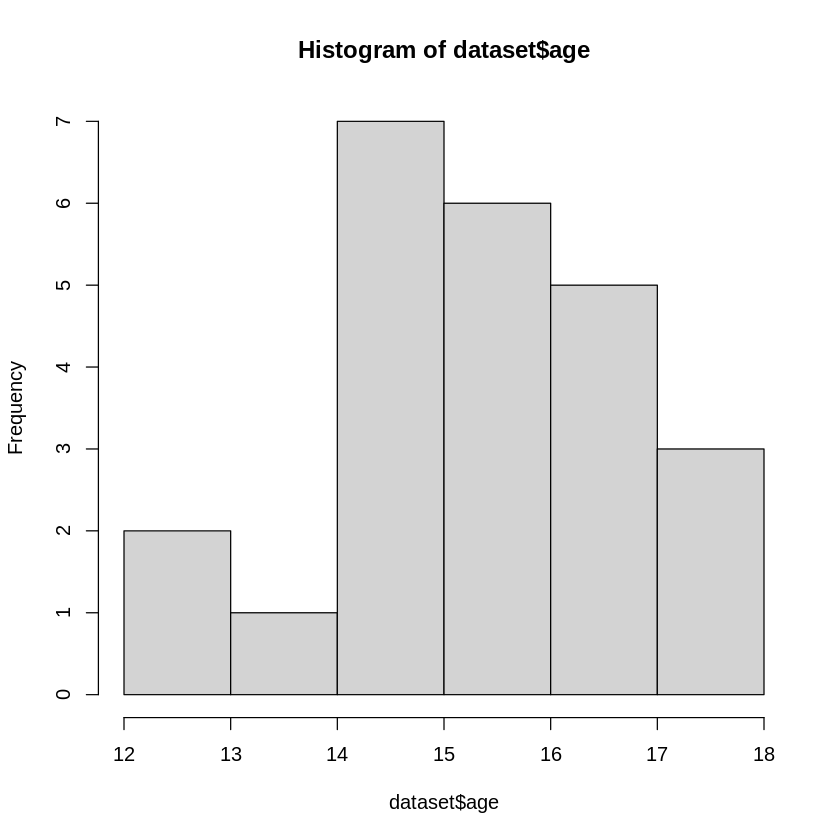

In [ ]:
hist(dataset$age)

In [ ]:
# предобработка: уберем пропуски в данных; удалим нецелевые признаки; 
df0 = data.frame(dataset)
df0 <- na.omit(df0)

df = subset(df0, select = -c(name,rating,alliance))

any(is.na(df))
nrow(df)

[1] FALSE

[1] 9

In [ ]:
# нормализуем данные
df_scaled <- data.frame(scale(df))

head(df_scaled)
nrow(df_scaled)

,index,unique_id,district,sex,age,volunteer,career,rating_ave,rating_rand,survival_days,rank,winner
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.1114683,-1.1114683,-1.0561574,-1.054093,0.5345225,0.843274,1.054093,0.05847053,0.05847053,-0.8588755,0.87658434,-0.5039526
2,-1.0124266,-1.0124266,-1.0561574,0.843274,0.5345225,0.843274,1.054093,0.58470535,0.58470535,-1.6318635,1.78688347,-0.5039526
3,-0.9133848,-0.9133848,-0.8581279,-1.054093,1.0690450,0.843274,1.054093,0.58470535,0.58470535,0.6871004,-0.64058087,-0.5039526
4,-0.8143431,-0.8143431,-0.8581279,0.843274,-0.5345225,0.843274,1.054093,0.58470535,0.58470535,-0.2791345,0.26971826,-0.5039526
10,-0.2200927,-0.2200927,-0.2640393,0.843274,-0.5345225,-1.054093,-0.843274,-2.04646871,-2.04646871,0.3006064,-0.33714782,-0.5039526
21,0.8693663,0.8693663,0.9241377,-1.054093,1.0690450,-1.054093,-0.843274,0.58470535,0.58470535,0.1073594,-0.03371478,-0.5039526


[1] 9

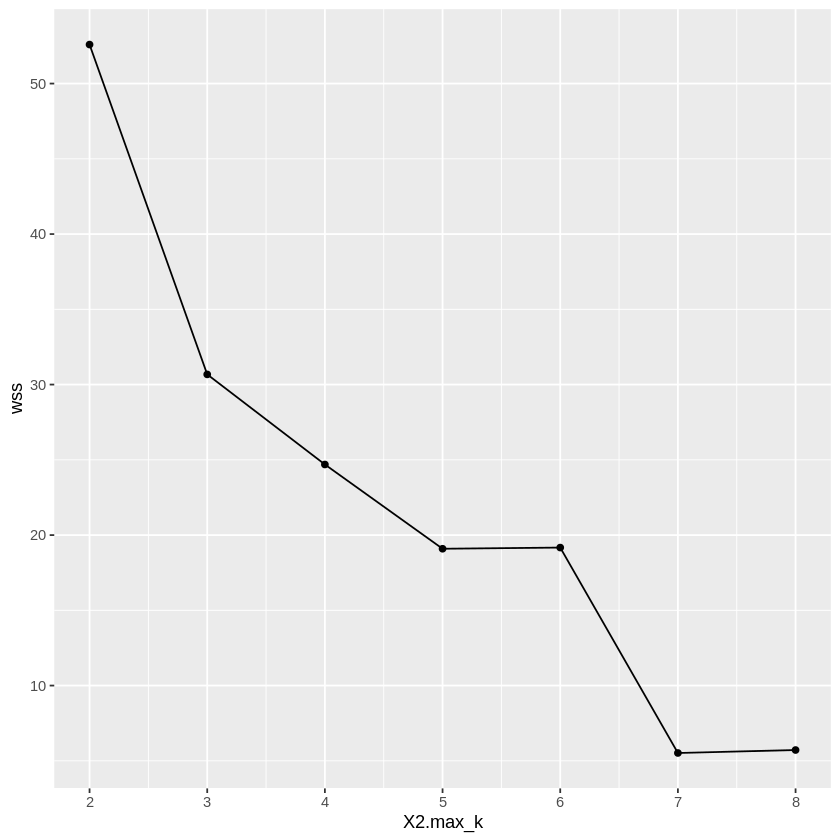

In [ ]:
set.seed(42)

# функция запускает алгоритм k-mean и сохраняет сумму квадратов расстояния в кластерах
kmean_withinss <- function(dataset, k) {
    cluster <- kmeans(dataset, k)
    return (cluster$tot.withinss)
}

# Set maximum cluster 
max_k <- 8 
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss, dataset = df_scaled)

# Create a data frame to plot the graph
elbow <-data.frame(2:max_k, wss)

# Plot the graph with gglop
ggplot(elbow, aes(x = X2.max_k, y = wss)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = seq(1, max_k, by = 1))

In [ ]:
optimal_k <- 3

# create clustering model
clust <- kmeans(df_scaled, optimal_k)

In [ ]:
# информация о кластерах
# clust$cluster
clust$centers
clust$size

,index,unique_id,district,sex,age,volunteer,career,rating_ave,rating_rand,survival_days,rank,winner
1,1.0344358,1.0344358,1.0561574,-0.4216370,0.3563483,-0.421637,-0.843274,0.4092937,0.4092937,0.8803474,-0.8428696,1.0079053
2,-0.9629057,-0.9629057,-0.9571426,-0.1054093,0.4008919,0.843274,1.054093,0.4531466,0.4531466,-0.5206933,0.5731513,-0.5039526
3,0.3741576,0.3741576,0.3300492,0.8432740,-1.3363062,-1.054093,-0.843274,-1.5202339,-1.5202339,-0.2791345,0.1180017,-0.5039526


[1] 3 4 2

In [ ]:
# присвоим метки кластеров исходному набору данных
df$Cluster <- clust$cluster
df$Cluster.Label <- as.character(clust$cluster)

df_scaled$Cluster <- clust$cluster
df_scaled$Cluster.Label <- as.character(clust$cluster)

head(df)

,index,unique_id,district,sex,age,volunteer,career,rating_ave,rating_rand,survival_days,rank,winner,Cluster,Cluster.Label
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,1,1,0,17,1,1,9,9,9,8,0,2,2
2,1,2,1,1,17,1,1,10,10,5,11,0,2,2
3,2,3,2,0,18,1,1,10,10,17,3,0,2,2
4,3,4,2,1,15,1,1,10,10,12,6,0,2,2
10,9,10,5,1,15,0,0,5,5,15,4,0,3,3
21,20,21,11,0,18,0,0,10,10,14,5,0,1,1


In [ ]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

In [ ]:
# Построим тепловую карту
center <- clust$centers

# Create dataset with the cluster number
cluster <- c(1:nrow(center))
center_df <- data.frame(cluster, center)

# Reshape the data
center_reshape <- gather(center_df, features, values, index:winner)
head(center_reshape)

,cluster,features,values
,<int>,<chr>,<dbl>
1,1,index,1.0344358
2,2,index,-0.9629057
3,3,index,0.3741576
4,1,unique_id,1.0344358
5,2,unique_id,-0.9629057
6,3,unique_id,0.3741576


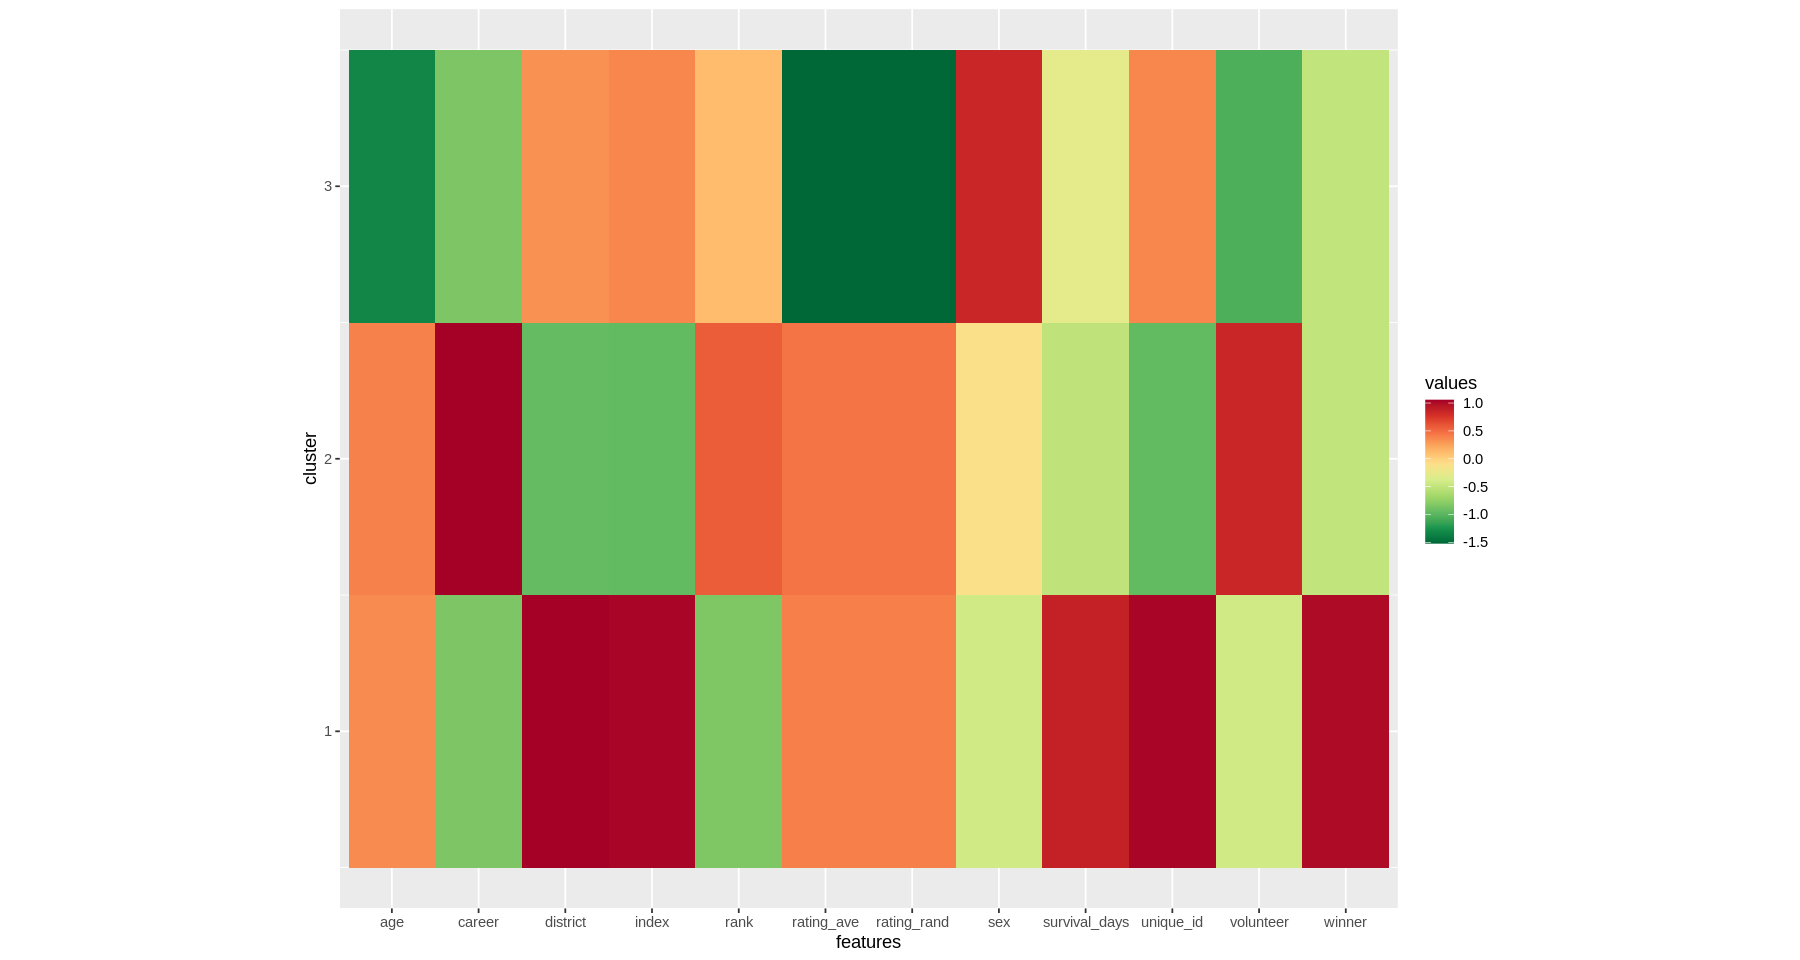

In [ ]:
# Create the palette
hm.palette <-colorRampPalette(rev(brewer.pal(10, 'RdYlGn')), space='Lab')

# Plot the heat map
ggplot(data = center_reshape, aes(x = features, y = cluster, fill = values)) +
    scale_y_continuous(breaks = seq(1, 8, by = 1)) +
    geom_tile() +
    coord_equal() +
    scale_fill_gradientn(colours = hm.palette(50)) +
    theme(aspect.ratio = 0.85)

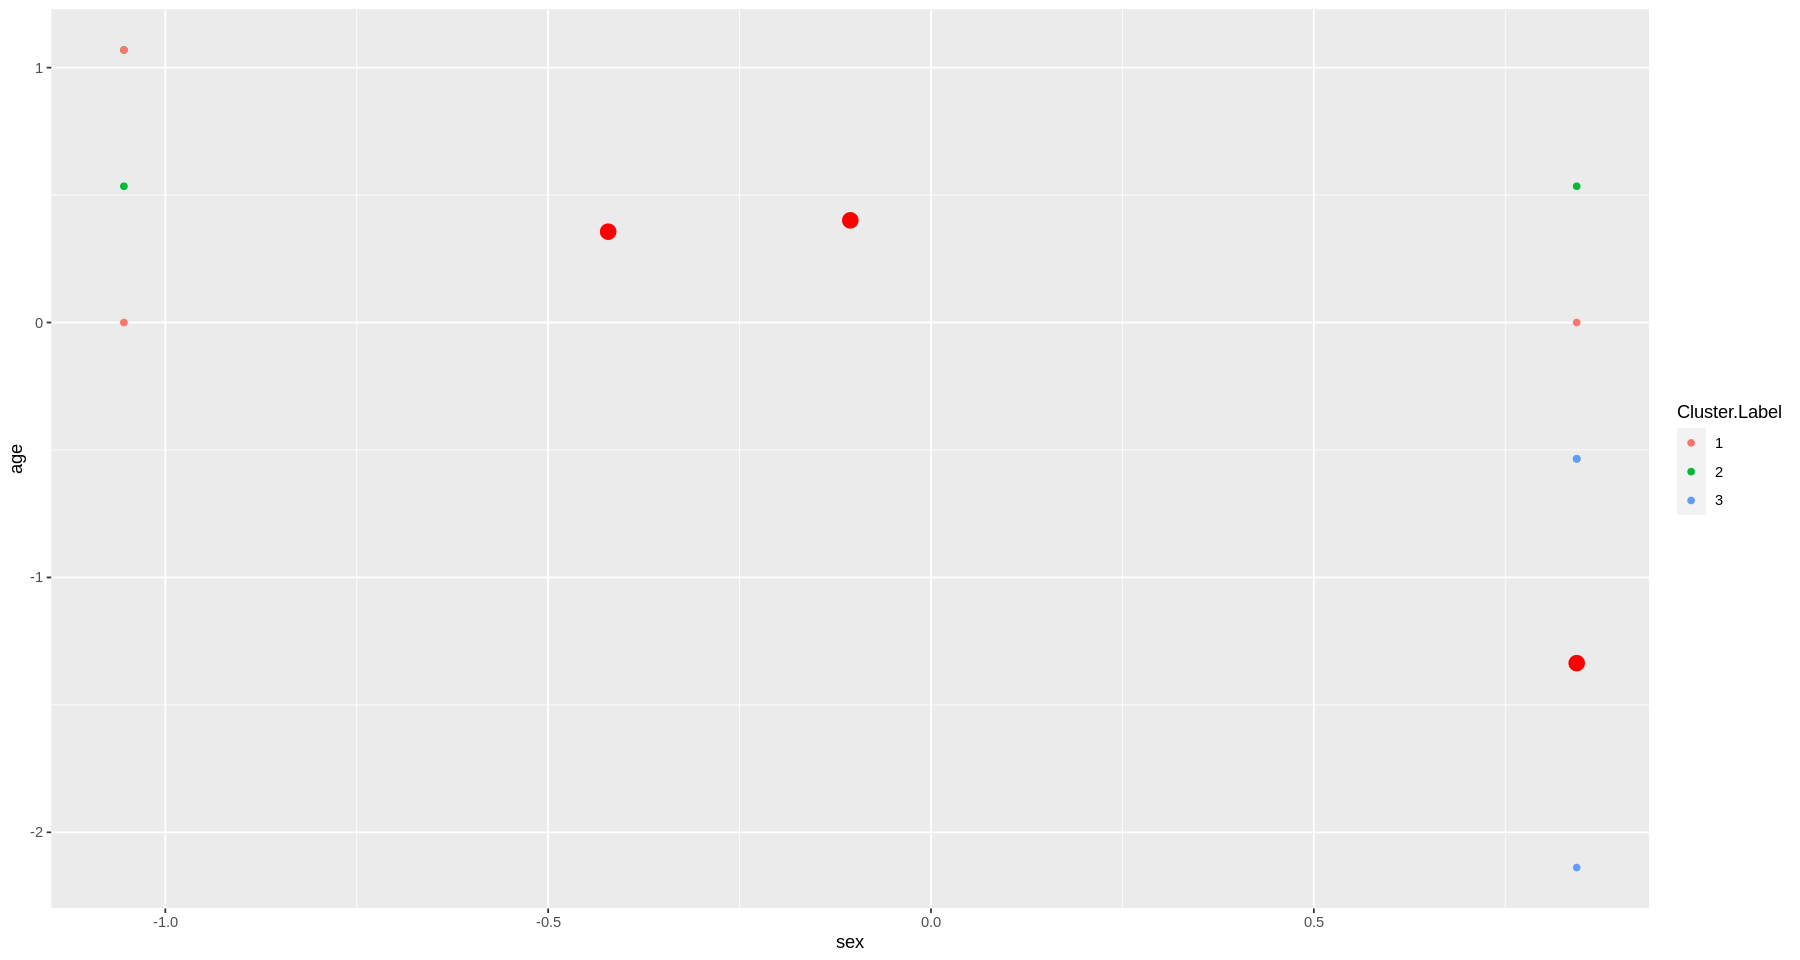

In [ ]:
# визуализация данных в разрезе возраста и дохода покупателя с центрами кластеров
ggplot() +
  geom_point(data = df_scaled, mapping = aes(x = sex, y = age, colour = Cluster.Label)) +
    geom_point(mapping = aes_string(x = clust$centers[, "sex"], 
                                  y = clust$centers[, "age"]),
                                  color = "red", size = 4)

In [ ]:
2 часть

In [ ]:

# libraries
install.packages("naivebayes")
install.packages("psych")

library(naivebayes)
library(dplyr)
library(ggplot2)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# считываем датасет
getwd()
data <- read.csv('https://raw.githubusercontent.com/bkrai/Statistical-Modeling-and-Graphs-with-R/main/binary.csv')

[1] "/content"

In [ ]:
# содержимое данных
str(data)
summary(data)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [ ]:
# поля rank и admit категориальные переменные, приведем к фактору (строка-категория)
data$rank <- as.factor(data$rank)
data$admit <- as.factor(data$admit)

In [ ]:
# разбиение выборки на обучающую и тестовую выборки в пропорции 80% к 20% соответственно
set.seed(42)
ind <- sample(2, nrow(data), replace=TRUE, prob=c(0.8,.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [ ]:
# модель Naive Bayes; admit как функция для всех остальных данных (.)
model <- naive_bayes(admit ~ ., data = train, usekernel = T)
model


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = admit ~ ., data = train, usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

       0        1 
0.677116 0.322884 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: gre::0 (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (216 obs.);	Bandwidth 'bw' = 35.36

       x               y            
 Min.   :193.9   Min.   :0.0000012  
 1st Qu.:372.0   1st Qu.:0.0002996  
 Median :550.0   Median :0.0012170  
 Mean   :550.0   Mean   :0.0014027  
 3rd Qu.:728.0   3rd Q

In [ ]:
# предсказание на тренировочно выборке
p <- predict(model, train, type= 'prob')
head(cbind(p, train))

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


,0,1,admit,gre,gpa,rank
,<dbl>,<dbl>,<fct>,<int>,<dbl>,<fct>
3,0.1796866,0.8203134,1,800,4.00,1
5,0.8895321,0.1104679,0,520,2.93,4
6,0.6270414,0.3729586,1,760,3.00,2
7,0.5318809,0.4681191,1,560,2.98,1
8,0.8889455,0.1110545,0,400,3.08,2
9,0.7995766,0.2004234,1,540,3.39,3


In [ ]:
cat("# Misclassification error - train data:")
p1 <- predict(model, within(train, rm(admit)))
(tab1 <- table(p1, train$admit))
1 - sum(diag(tab1))/ sum(tab1)

cat("\n# Misclassification error - test data")
p2 <- predict(model, within(test, rm(admit)))
(tab2 <- table(p2, test$admit))
1 - sum(diag(tab2))/ sum(tab2)

# Misclassification error - train data:

   
p1    0   1
  0 200  74
  1  16  29

[1] 0.2821317


# Misclassification error - test data

   
p2   0  1
  0 52 20
  1  5  4

[1] 0.308642

In [ ]:
# конструируем аналогичный фактор  
rank = as.factor(1:4)

# новые данные из 3х элементов
new <- data.frame(gre=c(230, 600, 800), gpa=c(2.0, 3.0, 4.0), rank=rank[c(4, 2, 1)])
new$rank <- as.factor(new$rank)
new$gre <- as.integer(new$gre)

# метки
p3 <- predict(model, new)

cbind(admit=p3, new)

# ToDo: вывести графики

admit,gre,gpa,rank
<fct>,<int>,<dbl>,<fct>
0,230,2,4
0,600,3,2
1,800,4,1
